Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import math

In [2]:
pip install missingno

In [3]:
import missingno as msno

Data Initialization

In [4]:
df = pd.read_csv(r'insurance.csv')
df['index'] = df.index

Dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,index
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   index     1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
df['sex'] = df['sex'].replace(['female','male'],['0','1'])
df['smoker'] = df['smoker'].replace(['no','yes'],['0','1'])
df['region'] = df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'],['0','1','2','3'])

df

,age,sex,bmi,children,smoker,region,charges,index
0,19,0,27.900,0,1,0,16884.92400,0
1,18,1,33.770,1,0,1,1725.55230,1
2,28,1,33.000,3,0,1,4449.46200,2
3,33,1,22.705,0,0,2,21984.47061,3
4,32,1,28.880,0,0,2,3866.85520,4
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,1333
1334,18,0,31.920,0,0,3,2205.98080,1334
1335,18,0,36.850,0,0,1,1629.83350,1335
1336,21,0,25.800,0,0,0,2007.94500,1336


Missing Values Detection

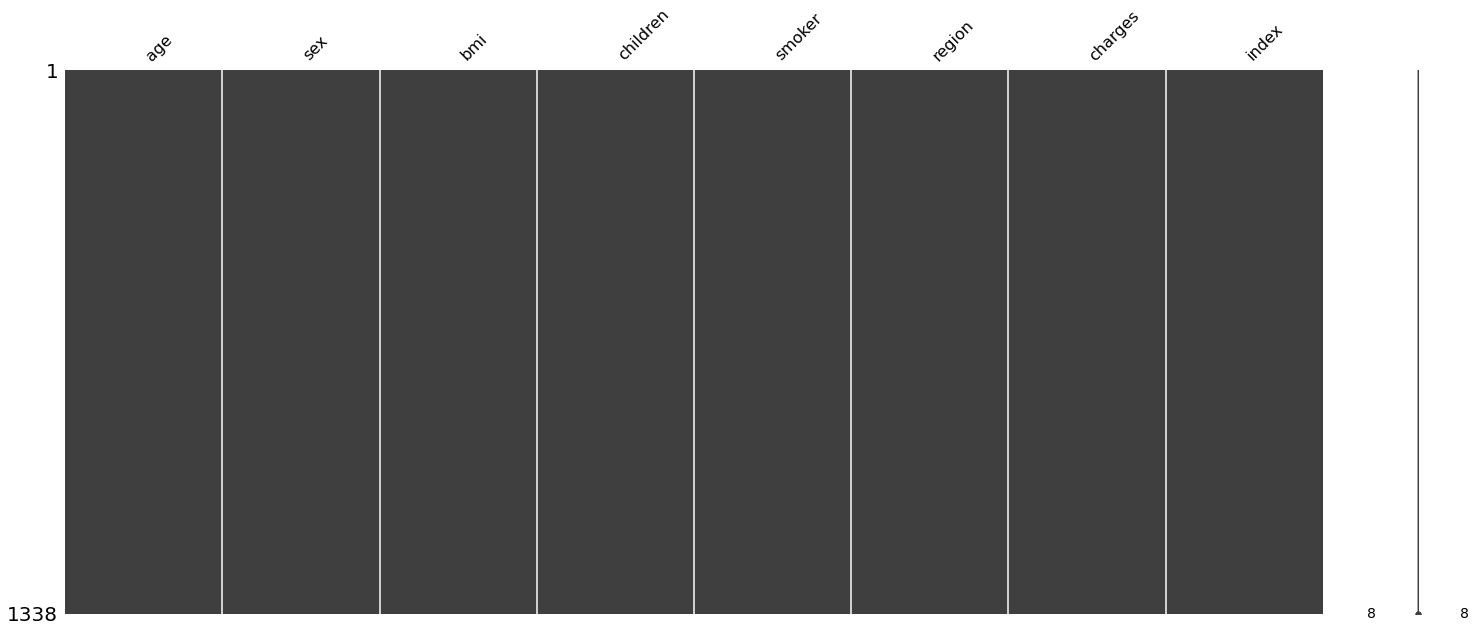

In [8]:
msno.matrix(df)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
index       0
dtype: int64

# Target Label

Target label is charges

In [10]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

Because charges has lots of unique values, we categorize them by mean.

Categorize Data (Numerical or Categorical)

In [11]:
df_numerical = df[['age','bmi','children','charges']]
df_categorical =  df[['sex','smoker','region','index']]

In [12]:
df_numerical.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [13]:
df_categorical.head()

,sex,smoker,region,index
0,0,1,0,0
1,1,0,1,1
2,1,0,1,2
3,1,0,2,3
4,1,0,2,4


Data Normalization


In [15]:
df_numerical.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [16]:
mean_num = np.mean(df_numerical['charges'])

df_numerical['charges'].values[df_numerical['charges'] <= mean_num] = 1
df_numerical['charges'].values[df_numerical['charges'] > mean_num] = 2



In [17]:
df['charges'].values[df['charges'] <= mean_num] = 1
df['charges'].values[df['charges'] > mean_num] = 2

In [18]:
len(df[df['charges'] == 1])

918

In [19]:
mean_num

13270.422265141257

In [20]:
len(df_numerical[df_numerical['charges'] == 1])

918

In [21]:
len(df_numerical[df_numerical['charges'] == 2])

420

In [22]:
df_numerical['index'] = df['index']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_numerical.head()

,age,bmi,children,charges,index
0,19,27.900,0,2.0,0
1,18,33.770,1,1.0,1
2,28,33.000,3,1.0,2
3,33,22.705,0,2.0,3
4,32,28.880,0,1.0,4


## Univariate

Numerical Data Distribution

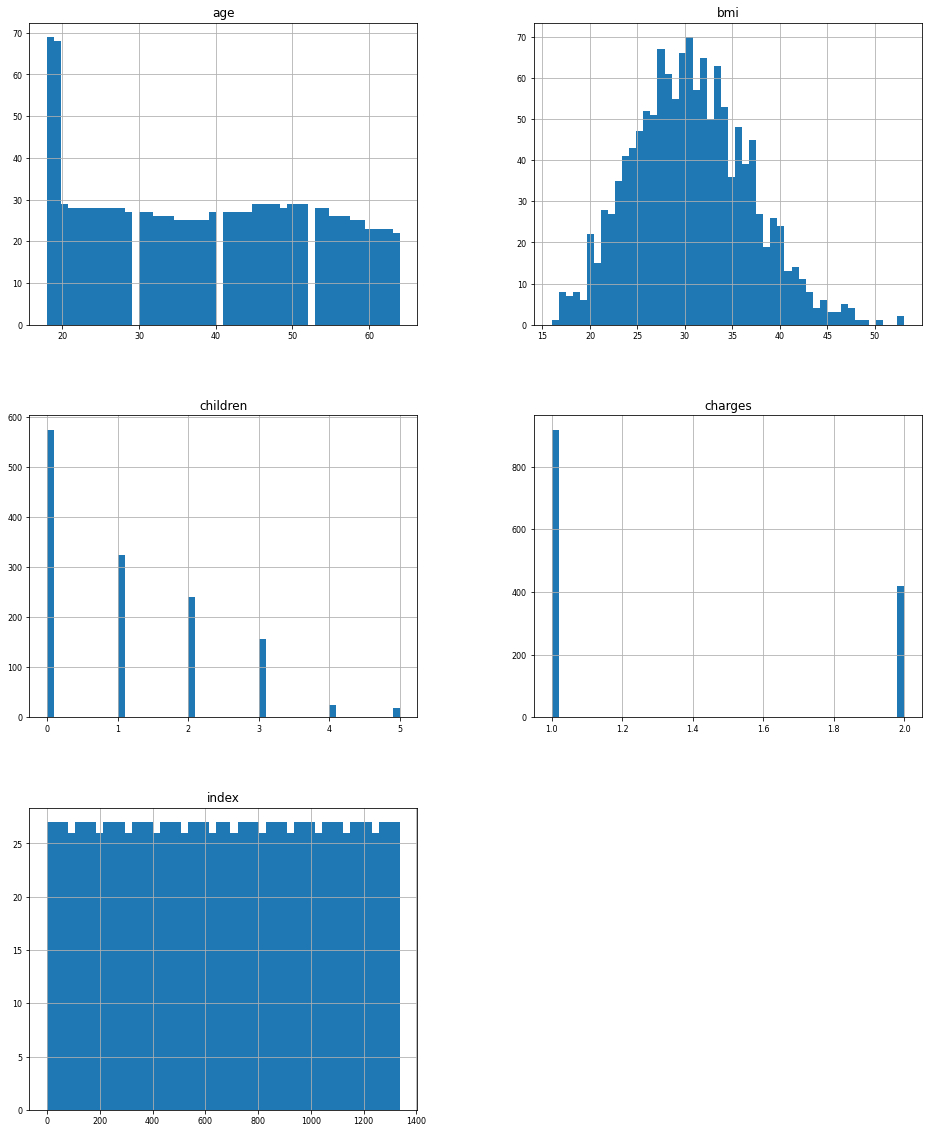

In [24]:
df_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

Categorical Data Distribution

**Pie Chart With Smoker Data**

In [25]:
df_categorical.head()

,sex,smoker,region,index
0,0,1,0,0
1,1,0,1,1
2,1,0,1,2
3,1,0,2,3
4,1,0,2,4


In [26]:
smoking_yes = df_categorical[df_categorical['smoker']=='1']
smoking_no = df_categorical[df_categorical['smoker']=='0']

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

**Pie chart with Gender**

In [27]:
male = df_categorical[df_categorical['sex']=='1']
female = df_categorical[df_categorical['sex']=='0']

labels = ['MALE','FEMALE']
values = [len(male), len(female)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on - SEX")
fig.show()

**Pie chart with region**

In [28]:
southwest = df_categorical[df_categorical['region']=='0']
southeast = df_categorical[df_categorical['region']=='1']
northwest = df_categorical[df_categorical['region']=='2']
northeast = df_categorical[df_categorical['region']=='3']

labels = ['southwest', 'southeast', 'northwest', 'northeast']
values = [len(southwest), len(southeast),len(northwest),len(northeast)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on - Region")
fig.show()

**Pie chart with children**

In [29]:
df_numerical['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [30]:
child1 = df_numerical[df_numerical['children']==0]
child2 = df_numerical[df_numerical['children']==1]
child3 = df_numerical[df_numerical['children']==2]
child4 = df_numerical[df_numerical['children']==3]
child5 = df_numerical[df_numerical['children']==4]
child6 = df_numerical[df_numerical['children']==5]

labels = ['children 1', 'children 2', 'children 3', 'children 4', 'children 5', 'children 6']
values = [len(child1), len(child2), len(child3), len(child4), len(child5), len(child6)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on - Children")
fig.show()

**Male and female Smoker Data**

In [31]:
male_smoker = smoking_yes[smoking_yes['sex'] == '0']
female_smoker = smoking_yes[smoking_yes['sex'] == '1']

labels = ['MALE','FEMALE']
values = [len(male_smoker), len(female_smoker)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on - Smoking based on Sex")
fig.show()

**Male and female no smoker**

In [32]:
male_no_smoker = smoking_no[smoking_no['sex'] == '0']
female_no_smoker = smoking_no[smoking_no['sex'] == '1']

labels = ['MALE','FEMALE']
values = [len(male_no_smoker), len(female_no_smoker)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on - Not Smoking based on Sex")
fig.show()

# Data Correlation

In [33]:
data_corr = df.corr()['charges'][:-1] # -1 because the latest row is SalePrice
print("all other features correlation to the charges:\n", data_corr.sort_values(ascending=False))

golden_features_list = data_corr[abs(data_corr) > 0.1].sort_values(ascending=False) ##write your code here
print("There is {} strongly correlated values with charges:\n{}".format(len(golden_features_list), golden_features_list))

all other features correlation to the charges:
 charges     1.000000
age         0.156871
bmi         0.041705
children    0.024236
Name: charges, dtype: float64
There is 2 strongly correlated values with charges:
charges    1.000000
age        0.156871
Name: charges, dtype: float64


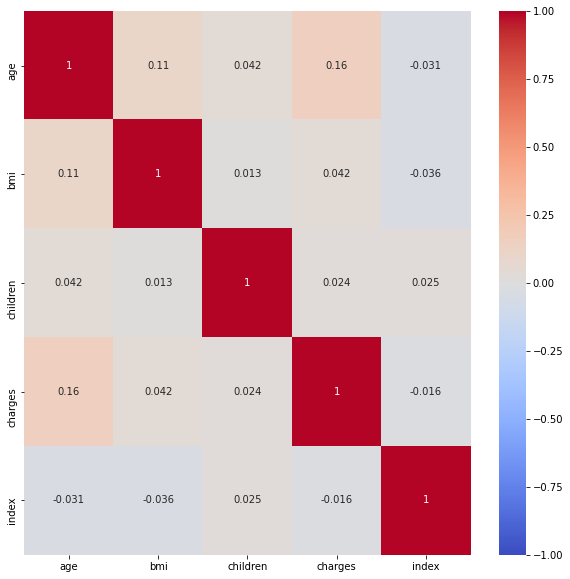

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

# Analysis Charges With other variables

## Is age an indicator for charges ? 

In [35]:
# age distribution
import plotly.figure_factory as ff
hist_data =[df["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [36]:
from plotly.figure_factory import create_distplot
less_avg = df[df["charges"]==1]["age"]
more_avg = df[df["charges"]==2]["age"]
hist_data = [more_avg,less_avg]
group_labels = ['Less than or equal average', 'More than average']
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(
    title_text="Analysis on average distribution by age")
fig.show()

## Children in Charges

In [37]:
fig = px.histogram(df, x="children", color="charges", marginal="violin", hover_data=df.columns)
fig.show()

In [38]:
from plotly.figure_factory import create_distplot
less_avg = df[df["charges"]==1]["children"]
more_avg = df[df["charges"]==2]["children"]
hist_data = [more_avg,less_avg]
group_labels = ['Less than or equal average', 'More than average']
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(
    title_text="Analysis on average distribution by number of children")
fig.show()

## BMI in Charges

In [39]:
fig = px.histogram(df, x="bmi", color="charges", marginal="violin", hover_data=df.columns)
fig.show()

In [40]:
from plotly.figure_factory import create_distplot
less_avg = df[df["charges"]==1]["bmi"]
more_avg = df[df["charges"]==2]["bmi"]
hist_data = [more_avg,less_avg]
group_labels = ['Less than or equal average', 'More than average']
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(
    title_text="Analysis on average distribution by bmi")
fig.show()

# Categorical

## Is gender a factor of charges?

In [41]:
male = df[df["sex"]=='1']
female = df[df["sex"]=='0']

male_more = male[male["charges"]==2]
male_less = male[male["charges"]==1]
female_more = female[female["charges"]==2]
female_less = female[female["charges"]==1]

labels = ['Male - MoreAvg','Male - LessAvg', "Female -  MoreAvg", "Female - LessAvg"]
values = [len(male_more),len(male_less),
         len(female_more),len(female_less)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Charges - Gender")
fig.show()

## Smoking with Charges

In [42]:
smoker = df[df["smoker"]=='1']
nosmoker = df[df["smoker"]=='0']

smoker_more = smoker[smoker["charges"]==2]
smoker_less = smoker[smoker["charges"]==1]
nosmoker_more = nosmoker[nosmoker["charges"]==2]
nosmoker_less = nosmoker[nosmoker["charges"]==1]

labels = ['Smoker - MoreAvg','Smoker - LessAvg', "NoSmoker -  MoreAvg", "NoSmoker - LessAvg"]
values = [len(smoker_more),len(smoker_less),
         len(nosmoker_more),len(nosmoker_less)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Charges - Smoker")
fig.show()

## Region with charges

In [43]:
sw = df[df['region']=='0']
se = df[df['region']=='1']
nw = df[df['region']=='2']
ne = df[df['region']=='3']

sw_more = sw[sw["charges"]==2]
se_more = se[se["charges"]==2]
nw_more = nw[nw["charges"]==2]
ne_more = ne[ne["charges"]==2]

sw_less = sw[sw["charges"]==1]
se_less = se[se["charges"]==1]
nw_less = nw[nw["charges"]==1]
ne_less = ne[ne["charges"]==1]

In [44]:
# More average
labels = ['Southwest - MoreAvg','Southeast - MoreAvg', "Northwest -  MoreAvg", "Northeast - MoreAvg"]
values = [len(sw_more),len(se_more),
         len(nw_more),len(ne_more)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Charges with more avg - Area")
fig.show()

In [45]:
# Less Average
labels = ['Southwest - LessAvg','Southeast - LessAvg', "Northwest -  LessAvg", "Northeast - LessAvg"]
values = [len(sw_less),len(se_less),
         len(nw_less),len(ne_less)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Charges with more avg - Area")
fig.show()